# Part2: Face Recognition

Task is to recognize a faces

# Dataset
Aligned Face Dataset from Pinterest

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and aligned using dlib library.

Mount Google drive if you are using google colab

- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [2]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Change current working directory to project folder. [ Score: 2 points ]

In [4]:
import os
path='/content/drive/MyDrive/AIML/projects/CV2/Part2/'
os.chdir(path)

# Extract the zip file [ Score: 2 points ]

- Extract Aligned Face Dataset from Pinterest.zip

In [ ]:
train_images = 'Part 3 - Aligned Face Dataset from Pinterest.zip'

In [ ]:
import zipfile
archive = zipfile.ZipFile(path+"/"+train_images, 'r')
archive.extractall()

### Function to load images

- Define a function to load the images from the extracted folder and map each image with person id

In [5]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image

- Define a function to load image from the metadata

In [6]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

Load a sample image [ Score: 2 points ]

- Load one image using the function "load_image"

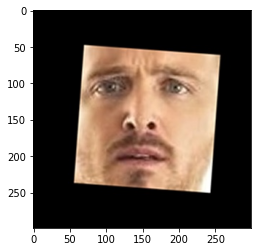

In [7]:
import matplotlib.pyplot as plt
img_1 = load_image(metadata[10].image_path())
plt.imshow(img_1)

VGG Face model

- Here we are giving you the predefined model for VGG face

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

### Load the model and weights [ Score: 2 points ]

- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [9]:
model = vgg_face()
model.load_weights('Part 3 - vgg_face_weights.h5')

### Get vgg_face_descriptor

In [10]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset

- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model.

In [11]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


Generate embeddings for all images [ Score: 3 points ] Write code to iterate through metadata and create embeddings for each image using vgg_face_descriptor.predict() and store in a list with name embeddings

If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [12]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
    img_path = metadata[i].image_path()
    print(i, metadata[i])
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224, 224))
    
    #obtaining embedding vectors of all images
    embedding_vectors = vgg_face_descriptor.predict(np.expand_dims(img, axis = 0))[0]
    embeddings[i] = embedding_vectors

Streaming output truncated to the last 5000 lines.
5770 PINS/pins_Sophie Turner/Sophie Turner57_1691.jpg
5771 PINS/pins_Sophie Turner/Sophie Turner59_1653.jpg
5772 PINS/pins_Sophie Turner/Sophie Turner58_1668.jpg
5773 PINS/pins_Sophie Turner/Sophie Turner5_1638.jpg
5774 PINS/pins_Sophie Turner/Sophie Turner60_1650.jpg
5775 PINS/pins_Sophie Turner/Sophie Turner61_1725.jpg
5776 PINS/pins_Sophie Turner/Sophie Turner65_1682.jpg
5777 PINS/pins_Sophie Turner/Sophie Turner64_1722.jpg
5778 PINS/pins_Sophie Turner/Sophie Turner62_1698.jpg
5779 PINS/pins_Sophie Turner/Sophie Turner66_1688.jpg
5780 PINS/pins_Sophie Turner/Sophie Turner69_1662.jpg
5781 PINS/pins_Sophie Turner/Sophie Turner68_1651.jpg
5782 PINS/pins_Sophie Turner/Sophie Turner70_1642.jpg
5783 PINS/pins_Sophie Turner/Sophie Turner71_1751.jpg
5784 PINS/pins_Sophie Turner/Sophie Turner72_1726.jpg
5785 PINS/pins_Sophie Turner/Sophie Turner73_1738.jpg
5786 PINS/pins_Sophie Turner/Sophie Turner76_1743.jpg
5787 PINS/pins_Sophie Turner/Sop

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [49]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

### Plot images and get distance between the pairs given below

- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

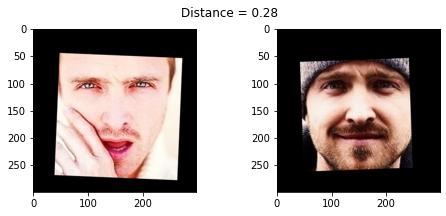

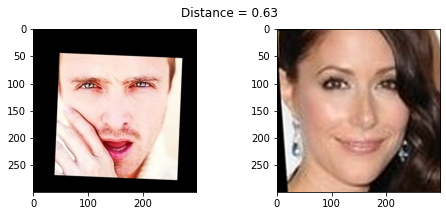

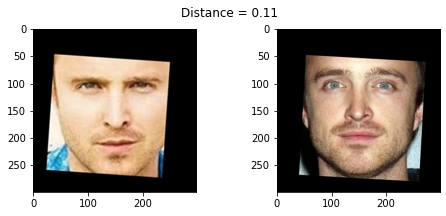

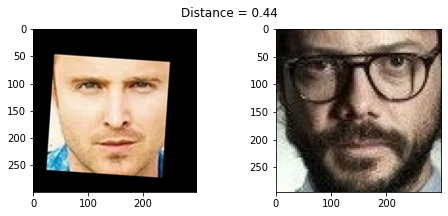

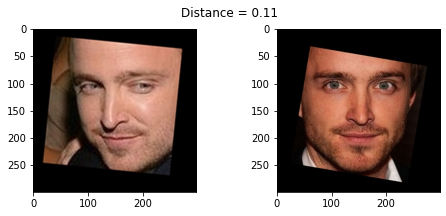

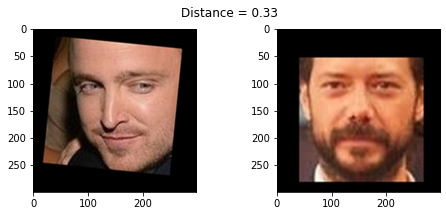

In [50]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(30, 31)
show_pair(30, 100)
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets [ Score: 2 points ]

- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [51]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])

#train labels
y_train = targets[train_idx]

#test labels
y_test = targets[test_idx]

### Encode the Labels [ Score: 2 points ]

- Encode the targets
- Use LabelEncoder

In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

print(le.classes_)
y_test_encoded = le.transform(y_test)

['pins_Aaron Paul' 'pins_Alvaro Morte' 'pins_Amanda Crew'
 'pins_Amaury Nolasco' 'pins_Anna Gunn' 'pins_Benedict Cumberbatch'
 'pins_Betsy Brandt' 'pins_Brenton Thwaites' 'pins_Brit Marling'
 'pins_Bryan Cranston' 'pins_Caity Lotz' 'pins_Cameron Monaghan'
 'pins_Chance Perdomo' 'pins_Chris Evans' 'pins_Chris Pratt'
 'pins_Cobie Smulders' 'pins_Danielle Panabaker' 'pins_Dave Franco'
 'pins_Dominic Purcell' 'pins_Dwayne Johnson' 'pins_Emilia Clarke'
 'pins_Emily Bett Rickards' 'pins_Emma Stone' 'pins_Gwyneth Paltrow'
 'pins_Henry Cavil' 'pins_Jason Momoa' 'pins_Jeremy Renner'
 'pins_Jesse Eisenberg' 'pins_Jim Parsons' 'pins_Jon Bernthal'
 'pins_Josh Radnor' 'pins_Kit Harington' 'pins_Krysten Ritter'
 'pins_Kumail Nanjiani' 'pins_Maisie Williams' 'pins_Mark Ruffalo'
 'pins_Martin Starr' 'pins_Melissa benoit' 'pins_Mike Colter'
 'pins_Morena Baccarin' 'pins_Morgan Freeman' 'pins_Natalie Portman '
 'pins_Neil Patrick Harris' 'pins_Paul Rudd' 'pins_Pedro Alonso'
 'pins_Peter Dinklage' 'pins_

In [53]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9573, 2622)

(1197, 2622)

(9573,)

(1197,)

### Standardize the feature values [ Score: 2 points ]

- Scale the features using StandardScaler

In [54]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

### Reduce dimensions using PCA (3 marks)

- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [55]:
from sklearn.decomposition import PCA

pca = PCA() 
  
X_train_pca = pca.fit_transform(X_train_std ) 
X_test_pca = pca.transform(X_test_std)

explained_variance = pca.explained_variance_ratio_ 
print(explained_variance)

[1.35816686e-01 5.37884213e-02 3.97140994e-02 ... 1.67327245e-09
 1.64024889e-09 9.16631622e-11]


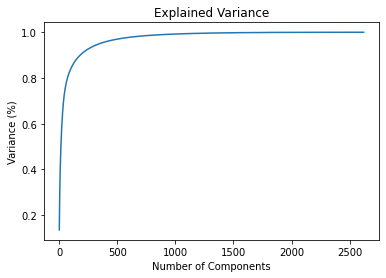

In [56]:
plt.figure()
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

As we can see from the above plot that approximately 128 components explain close to 98% variance, we can reduce the number of components to 128 in order to save the computational power without compromising much on the accuracy.

In [57]:
pca = PCA(n_components = 128) 
  
X_train_pca = pca.fit_transform(X_train_std) 
X_test_pca = pca.transform(X_test_std)

explained_variance = pca.explained_variance_ratio_ 
print(explained_variance)

[0.13581669 0.05378842 0.0397141  0.03705965 0.03393059 0.03122907
 0.02588875 0.02344749 0.02100691 0.0194481  0.01814524 0.01703415
 0.01660798 0.01559269 0.01425853 0.01372156 0.01303074 0.01224557
 0.0116059  0.01142286 0.01089521 0.01054404 0.00960961 0.0093641
 0.00917088 0.00884922 0.00836627 0.00764698 0.00761165 0.00730048
 0.00700572 0.00663658 0.00630387 0.00623691 0.00570724 0.00535268
 0.00532807 0.00513249 0.00501921 0.00486633 0.00441806 0.00433651
 0.00396975 0.0039102  0.00368101 0.00355299 0.00342994 0.00332051
 0.00327483 0.00319109 0.00313496 0.00308529 0.00289015 0.00283191
 0.0027797  0.00273349 0.00268058 0.00260212 0.00255719 0.00249984
 0.00237398 0.00231578 0.00225012 0.00216597 0.0021176  0.00204811
 0.00199326 0.00195096 0.00188132 0.00183428 0.00181638 0.00179121
 0.00175505 0.00173234 0.0016952  0.00165078 0.00164007 0.00160988
 0.00156844 0.00156409 0.00153513 0.00149261 0.00146931 0.0014397
 0.00140193 0.00137847 0.00137177 0.00134632 0.00132637 0.001285

### Build a Classifier (3 marks)

- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [62]:
from sklearn.svm import SVC

svc = SVC(C=5, kernel="rbf")
svc.fit(X_train_pca, y_train_encoded)
y_predict = svc.predict(X_test_pca)

In [63]:
from sklearn.metrics import accuracy_score

print('Accuracy Score of SVC Model- ', accuracy_score(y_test_encoded, y_predict))

Accuracy Score of SVC Model-  0.9657477025898078


In [64]:
y_predict_encoded = le.inverse_transform(y_predict)

We are getting an accuracy of 96.57% on the test data.

### Test results (2 marks)

- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

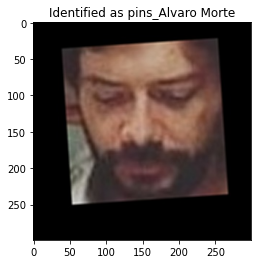

In [65]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');


# Import the the test image. Display the image. Use the SVM trained model to predict the face.

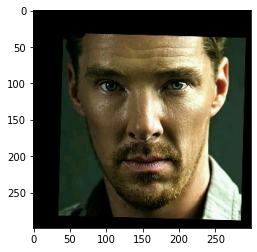

In [66]:
 

from matplotlib import pyplot as plt
import cv2

image_file = cv2.imread(path+"/"+"Part 2- Test Image - Benedict Cumberbatch9.jpg")
gray = cv2.cvtColor(image_file, cv2.COLOR_BGR2RGB)

plt.imshow(gray)

[ 5 19]


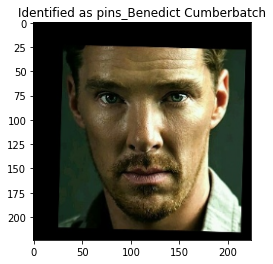

In [67]:
import warnings
from PIL import Image
from numpy import asarray
from keras.preprocessing.image import load_img
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')
img1 = load_image(path+"/"+"Part 2- Test Image - Benedict Cumberbatch9.jpg")
img2 = load_image(path+"/"+"Part 2 - Test Image - Dwayne Johnson4.jpg")
embeddings_test = np.zeros((2, 2622))
img1=(img1/255.).astype(np.float32)
img2=(img2/255.).astype(np.float32)

img1= cv2.resize(img1,dsize=(224,224))
img2= cv2.resize(img2,dsize=(224,224))

embedding_vector1= vgg_face_descriptor.predict(np.expand_dims(img1,axis=0))[0]
embedding_vector2= vgg_face_descriptor.predict(np.expand_dims(img2,axis=0))[0]

embeddings_test[0]=embedding_vector1
embeddings_test[1]=embedding_vector2

embeddings_test_n = scaler.transform(embeddings_test)
embeddings_test_pca = pca.transform(embeddings_test_n)
example_prediction = svc.predict(embeddings_test_pca)
print(example_prediction)
#Test Image1 prediction
example_identity = le.inverse_transform(example_prediction)[0]
plt.imshow(img1)
plt.title(f'Identified as {example_identity}');

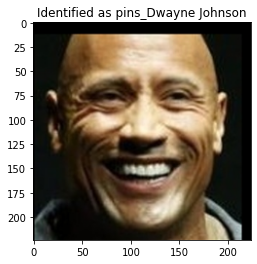

In [68]:
#Test Image2 prediction
example_identity1 = le.inverse_transform(example_prediction)[1]
plt.imshow(img2)
plt.title(f'Identified as {example_identity1}');

# Random 20 sample images from test data

In [69]:
def sample_img_plot(sample_idx):
  # Load image for sample_idx from test data
  sample_img = load_image(metadata[test_idx][sample_idx].image_path())
  # Get actual name
  actual_name = metadata[test_idx][sample_idx].name.split('_')[-1].title().strip()
  # Normalizing pixel values
  sample_img = (sample_img/255.).astype(np.float32)
  # Resize
  sample_img = cv2.resize(sample_img, (224, 224))

  # Obtain embedding vector for sample image
  embedding = vgg_face_descriptor.predict(np.expand_dims(sample_img, axis = 0))[0]
  # Scaled the vector and reshape
  embedding_scaled = scaler.transform(embedding.reshape(1, -1))
  # Predict
  sample_pred = svc.predict([X_test_pca[sample_idx]])
  # Transform back
  pred_name = le.inverse_transform(sample_pred)[0].split('_')[-1].title().strip()
  return sample_img, actual_name, pred_name

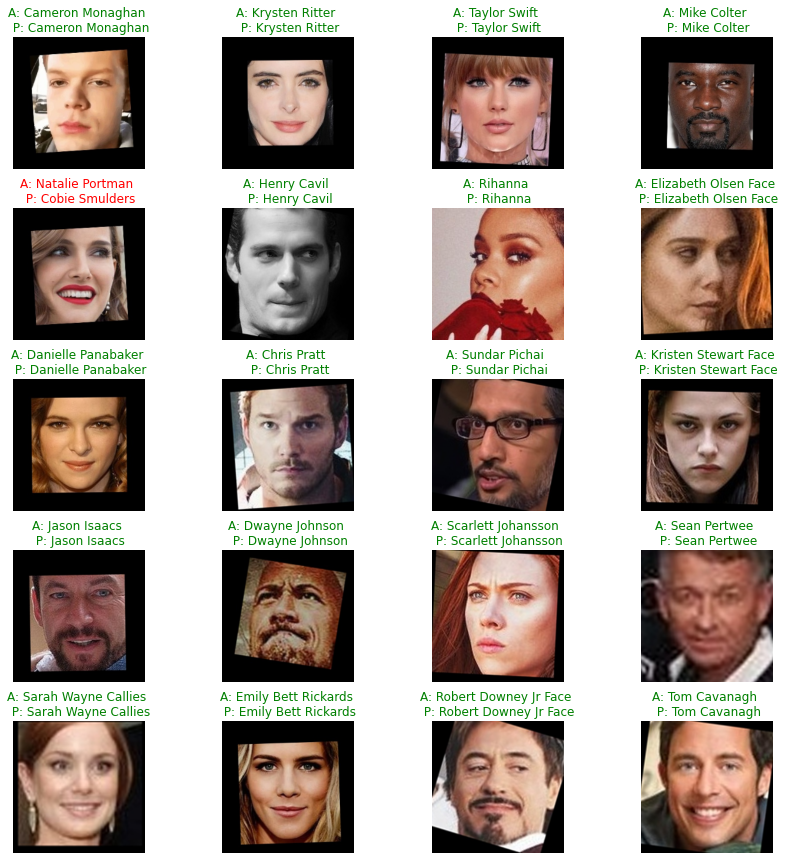

In [71]:
# Random 20 sample images from test data
import matplotlib.gridspec as gridspec
plt.figure(figsize = (15, 15))
gs1 = gridspec.GridSpec(5, 4)
gs1.update(wspace = 0, hspace = 0.3) 

for i in range(20):
    ax1 = plt.subplot(gs1[i])
    plt.axis('on')
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    
    sample_img, actual_name, pred_name = sample_img_plot(random.randint(1, 1197))
  
    plt.axis('off')
    plt.imshow(sample_img)
  
    plt.title(f"A: {actual_name} \n P: {pred_name}", color = 'green' if actual_name == pred_name else 'red')
plt.show()

#Conclusion
Task here was to recognize (aligned) faces from a dataset containing 10k+ images for 100 people using a pre-trained model on Face Recognition.

- VGG model with pre-trained weights was used to generate embeddings for each images in the dataset.
- Distance between two pair of images were also calculated and plotted. Since, there were 2,622 features for each image, PCA was used for dimension reduction after standardizing the features.
- With an cumulative explained variance of 98%, 128 PCA components were used.
- Using SVC we predicted the labels for test dataset with an accuracy of  96.57%.